In [1]:
!pip install ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.pt')

In [9]:
from google.colab import files
uploaded = files.upload()

video_path = list(uploaded.keys())[0]

Saving 4k-avengers-and-guardians-n9puh8kkzbbxvurw.jpg to 4k-avengers-and-guardians-n9puh8kkzbbxvurw.jpg


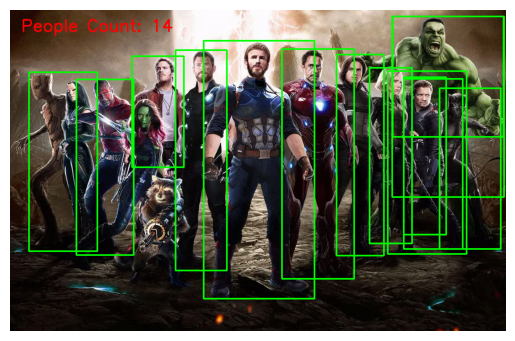

In [10]:
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference
    results = model(frame, verbose=False)
    person_count = 0

    for result in results:
        boxes = result.boxes
        for box in boxes:
            cls = int(box.cls[0])
            # Class 0 = 'person' in COCO dataset
            if cls == 0:
                person_count += 1
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)

    # Put text
    cv2.putText(frame, f'People Count: {person_count}', (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display frame
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)

cap.release()

In [11]:
cap = cv2.VideoCapture(video_path)
width  = int(cap.get(3))
height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)
    person_count = 0

    for result in results:
        for box in result.boxes:
            if int(box.cls[0]) == 0:
                person_count += 1
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)

    cv2.putText(frame, f'People Count: {person_count}', (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    out.write(frame)

cap.release()
out.release()

In [12]:
from google.colab import files
files.download('output.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>